<a href="https://colab.research.google.com/github/zoelpanca/WebsiteInBarberShop/blob/main/Kelompok_1_Blockchain_Data_Analis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from google.colab import files
import io
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
upload_files = files.upload()
for filename in upload_files.keys():
    raw_data=pd.read_csv(io.StringIO(upload_files[filename].decode('utf-8')))

Saving Life.csv to Life.csv


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
raw_data.drop('Country', inplace=True, axis=1)
raw_data.head(10)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
print(raw_data['Status'].value_counts())

Developing    2426
Developed      512
Name: Status, dtype: int64


In [6]:
raw_data['Status'].replace(['Developing', 'Developed'],[1,0], inplace=True)
raw_data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


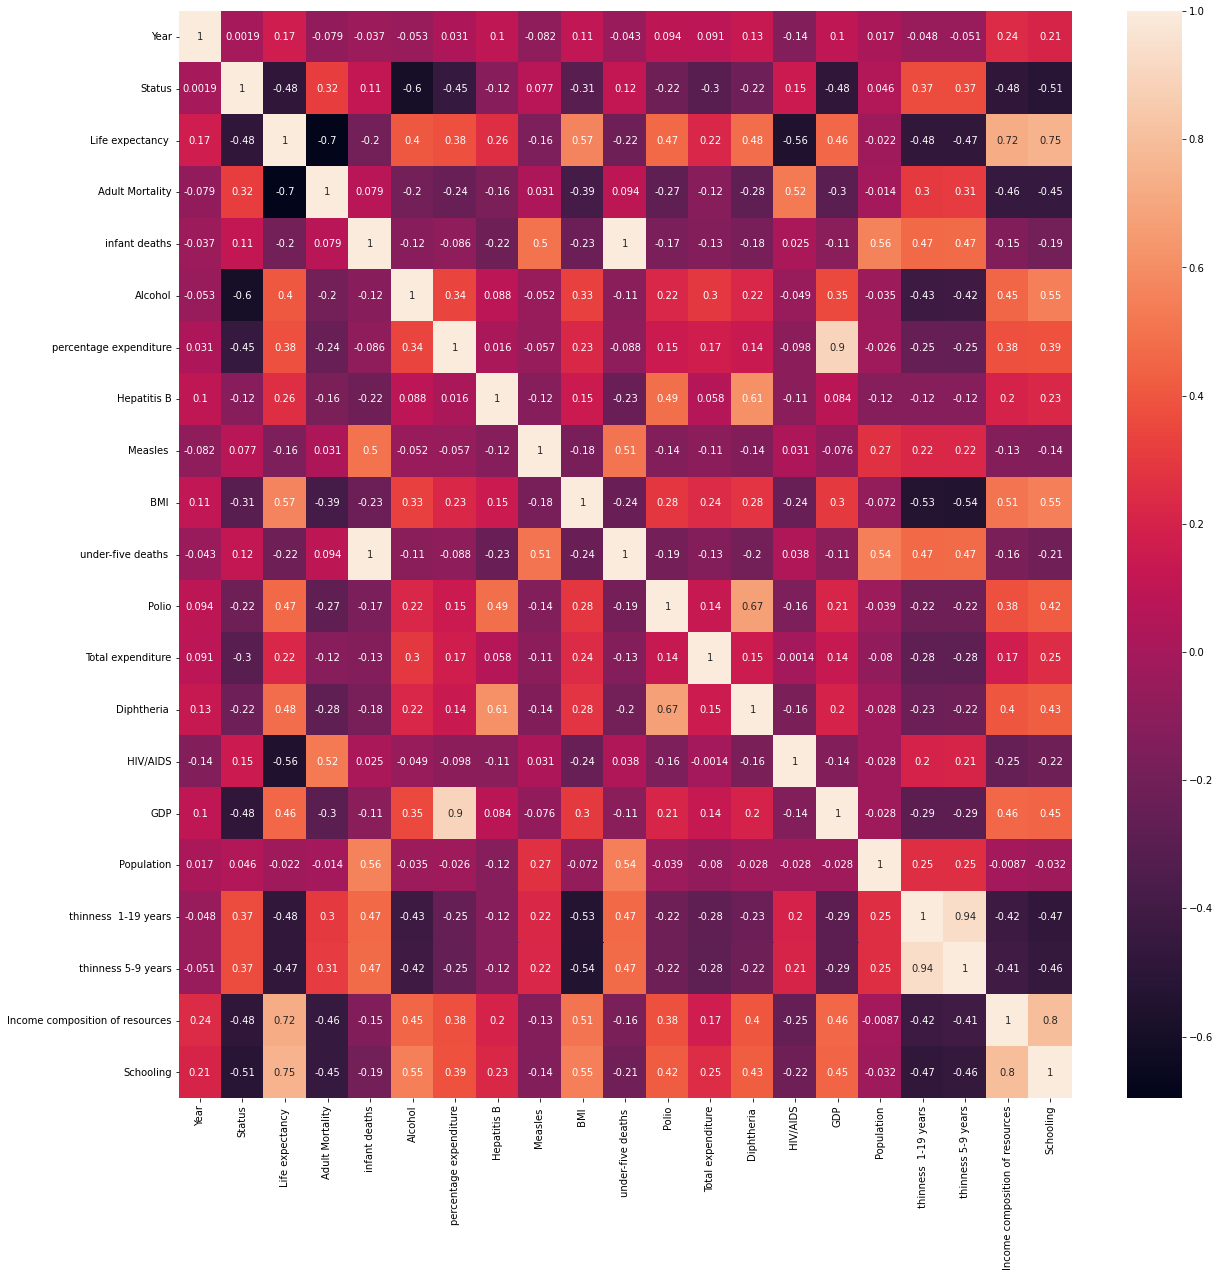

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(raw_data.corr(), annot=True)

In [21]:
dataset = pd.read_csv('/content/Life.csv', usecols = ['Life expectancy ',' BMI ','GDP','Diphtheria ', 'Polio', 'Income composition of resources', 'Schooling'])
dataset.head()

,Life expectancy,BMI,Polio,Diphtheria,GDP,Income composition of resources,Schooling
0,65.0,19.1,6.0,65.0,584.259210,0.479,10.1
1,59.9,18.6,58.0,62.0,612.696514,0.476,10.0
2,59.9,18.1,62.0,64.0,631.744976,0.470,9.9
3,59.5,17.6,67.0,67.0,669.959000,0.463,9.8
4,59.2,17.2,68.0,68.0,63.537231,0.454,9.5


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1    BMI                             2904 non-null   float64
 2   Polio                            2919 non-null   float64
 3   Diphtheria                       2919 non-null   float64
 4   GDP                              2490 non-null   float64
 5   Income composition of resources  2771 non-null   float64
 6   Schooling                        2775 non-null   float64
dtypes: float64(7)
memory usage: 160.8 KB


In [23]:
dataset.describe()

,Life expectancy,BMI,Polio,Diphtheria,GDP,Income composition of resources,Schooling
count,2928.000000,2904.000000,2919.000000,2919.000000,2490.000000,2771.000000,2775.000000
mean,69.224932,38.321247,82.550188,82.324084,7483.158469,0.627551,11.992793
std,9.523867,20.044034,23.428046,23.716912,14270.169342,0.210904,3.358920
min,36.300000,1.000000,3.000000,2.000000,1.681350,0.000000,0.000000
25%,63.100000,19.300000,78.000000,78.000000,463.935626,0.493000,10.100000
50%,72.100000,43.500000,93.000000,93.000000,1766.947595,0.677000,12.300000
75%,75.700000,56.200000,97.000000,97.000000,5910.806335,0.779000,14.300000
max,89.000000,87.300000,99.000000,99.000000,119172.741800,0.948000,20.700000


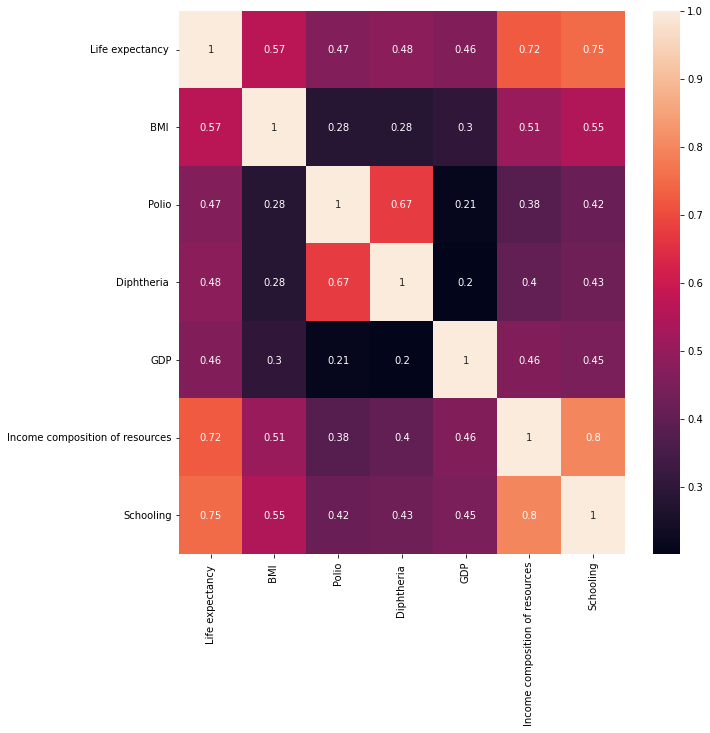

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

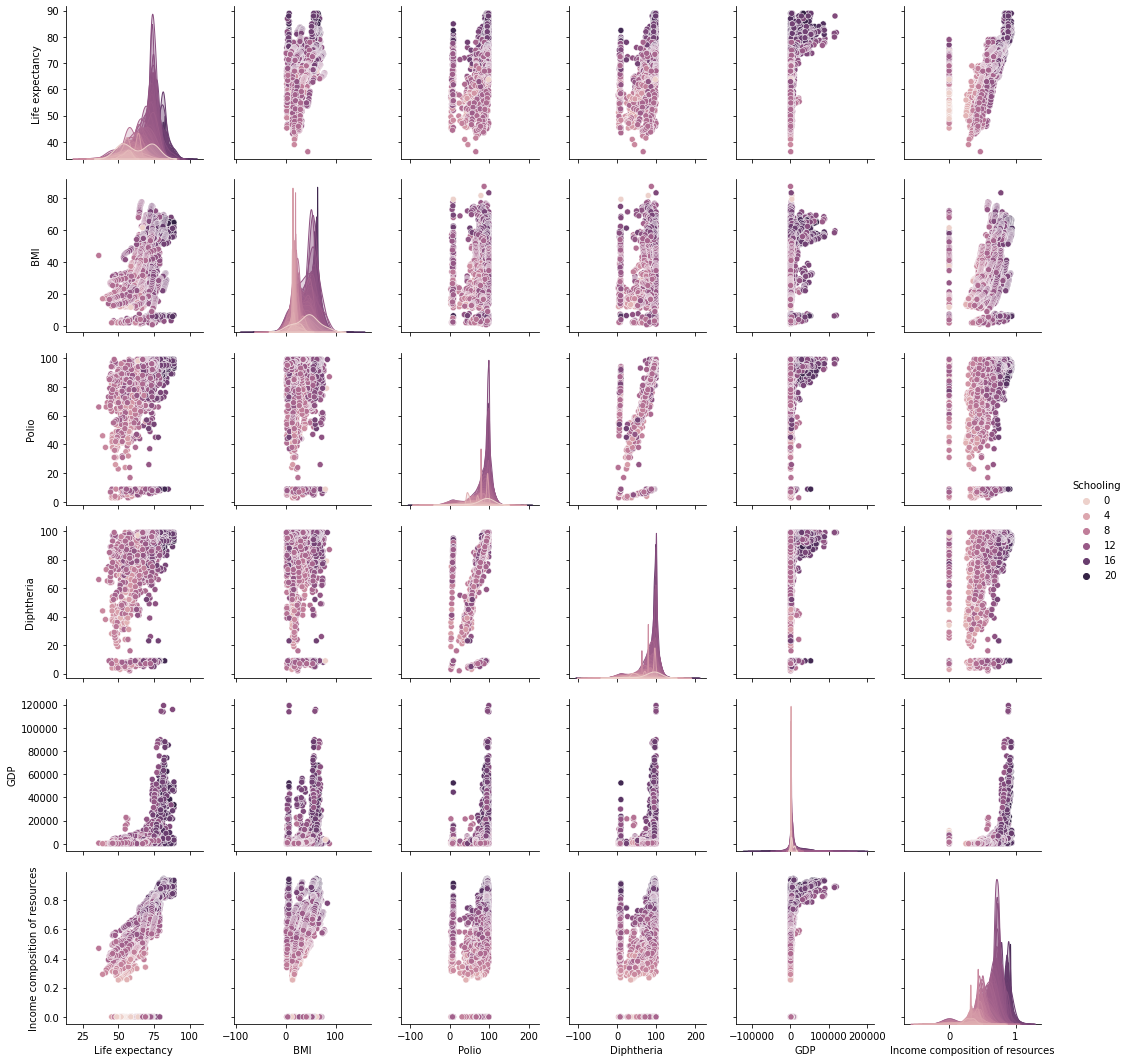

In [25]:
sns.pairplot(dataset, hue = "Schooling")

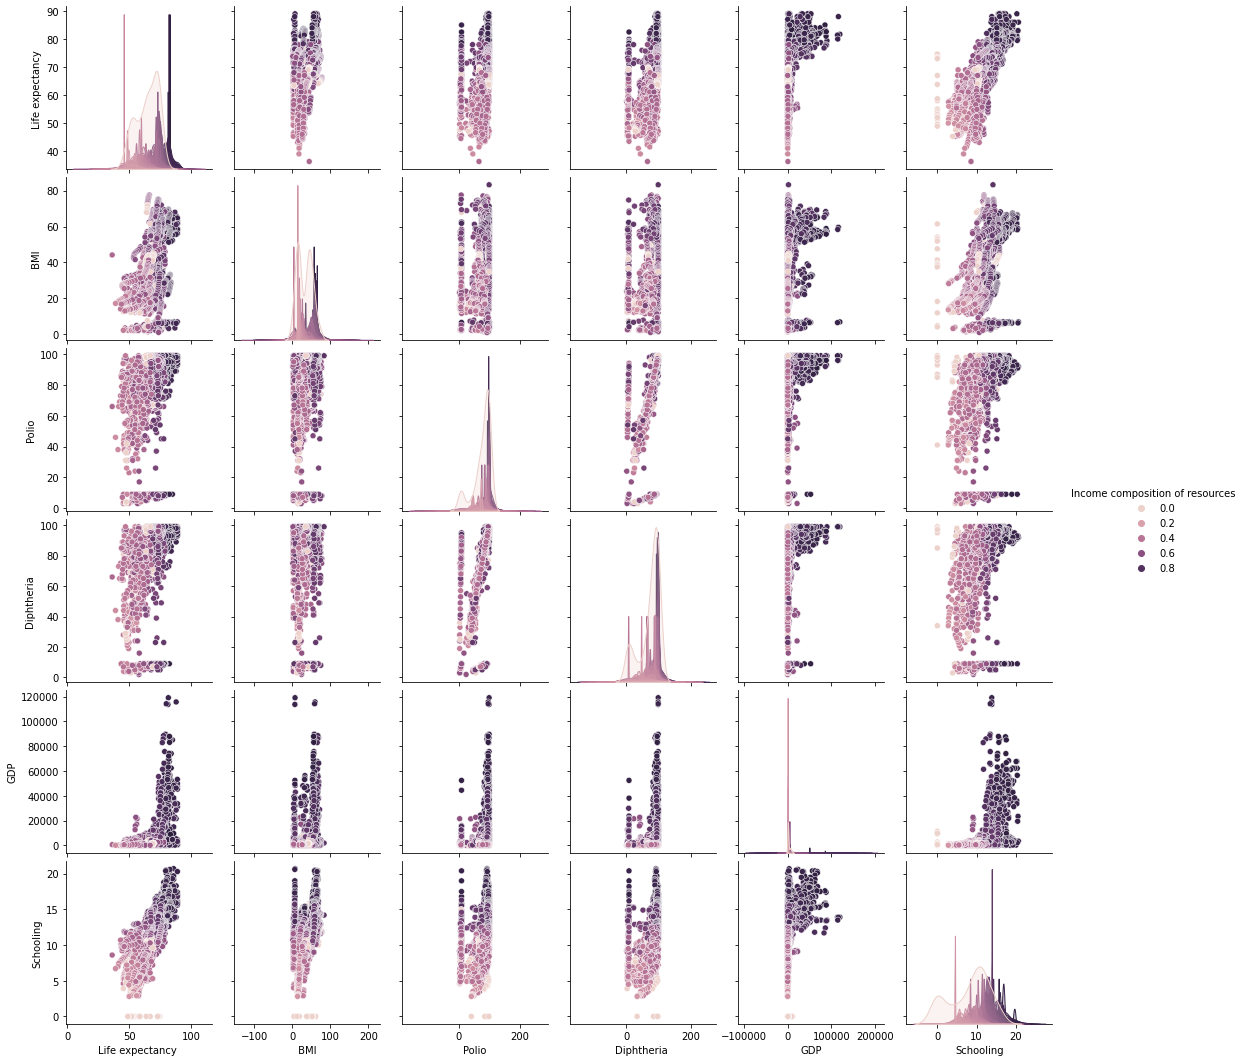

In [26]:
sns.pairplot(dataset, hue = "Income composition of resources")

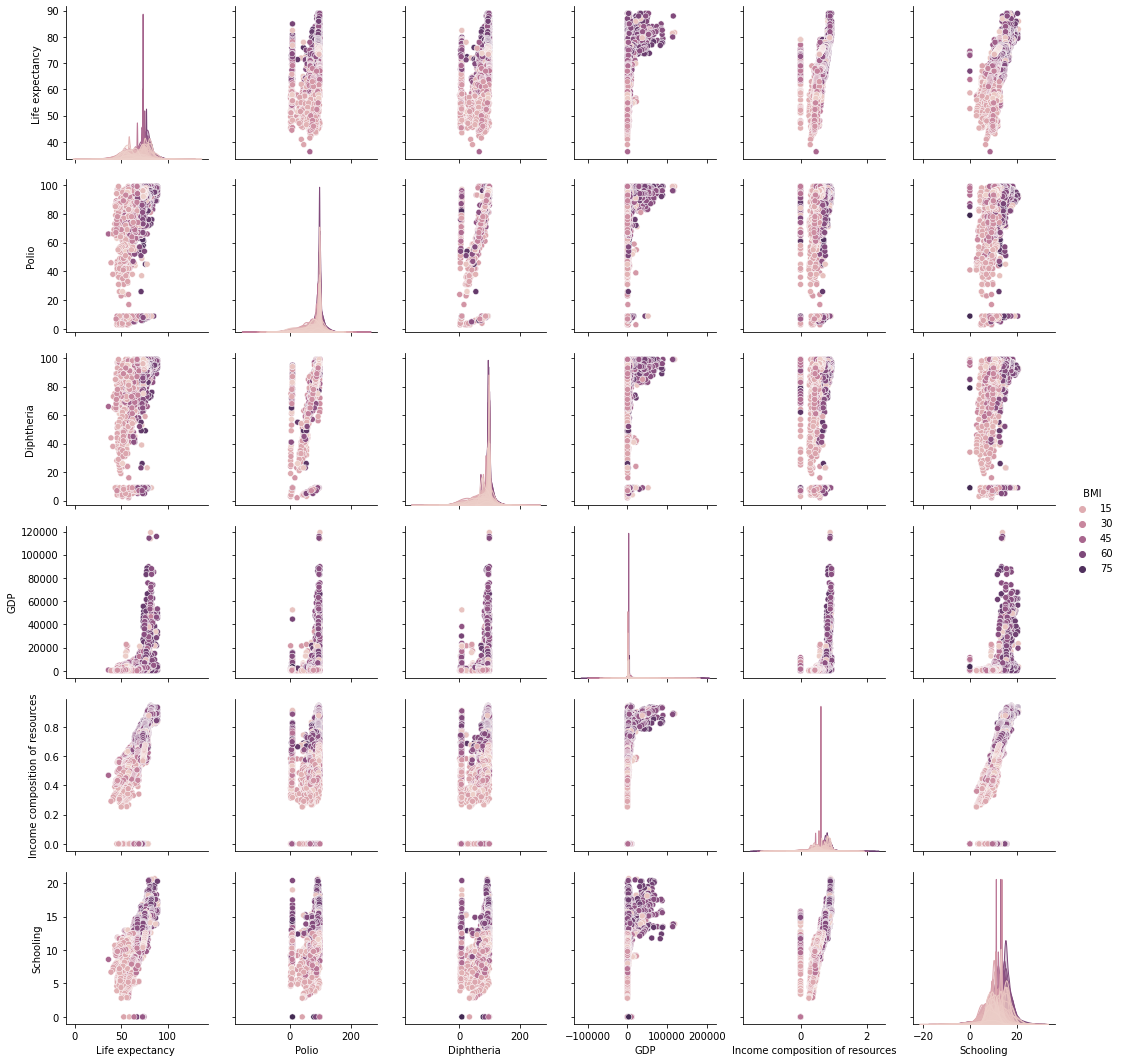

In [27]:
sns.pairplot(dataset, hue = " BMI ")

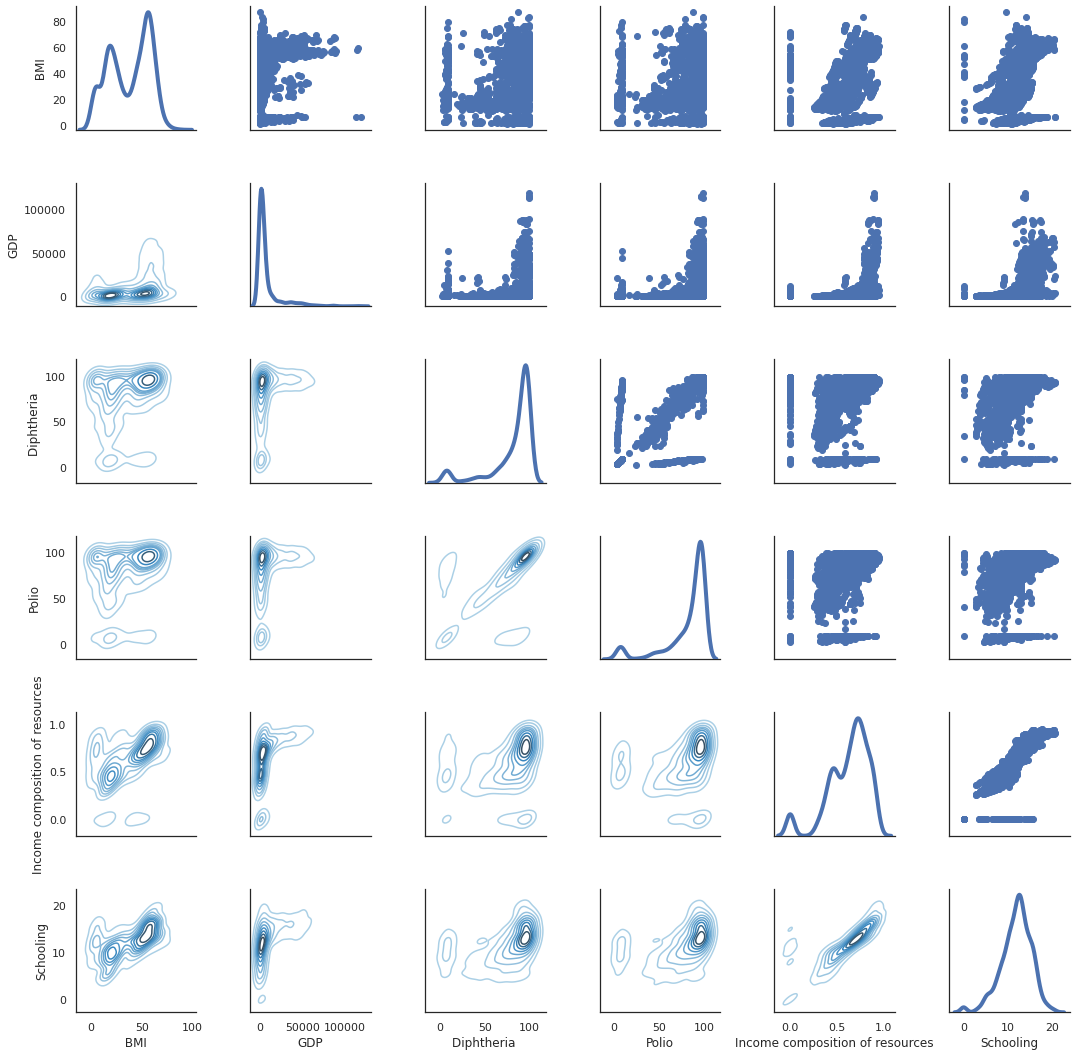

In [29]:
sns.set(style="white")
df = dataset.loc[:,[' BMI ', 'GDP', 'Diphtheria ','Polio','Income composition of resources','Schooling']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d", figsize=(15,21))
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=4)

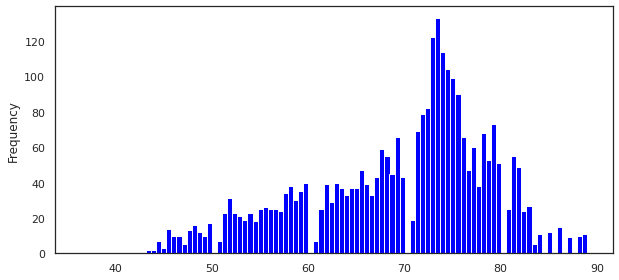

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dataset['Life expectancy '].plot(kind='hist', bins=100, color="blue")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb83b695650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb83b69f110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb83b6950d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb83b69fbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb83b627150>],
 'means': []}

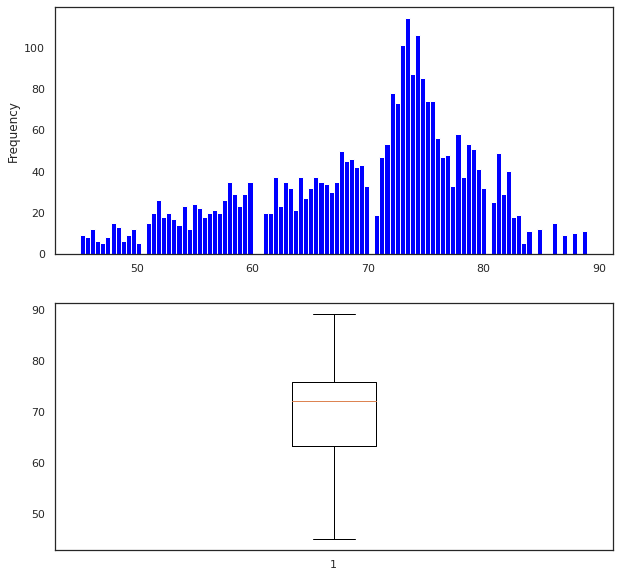

In [32]:
dataset = dataset[dataset['Life expectancy ']>45]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dataset['Life expectancy '].plot(kind='hist', bins=100, color="blue")
plt.subplot(2,1,2)
plt.boxplot(dataset['Life expectancy '])

In [33]:
dataset.isnull().sum()

Life expectancy                      0
 BMI                                32
Polio                               19
Diphtheria                          19
GDP                                443
Income composition of resources    160
Schooling                          160
dtype: int64

In [34]:
dataset[' BMI ']=dataset[' BMI '].fillna((dataset[' BMI '].mean()))
dataset['Polio']=dataset['Polio'].fillna((dataset['Polio'].mean()))
dataset['Diphtheria ']=dataset['Diphtheria '].fillna((dataset['Diphtheria '].mean()))
dataset['GDP']=dataset['GDP'].fillna((dataset['GDP'].mean()))
dataset['Income composition of resources']=dataset['Income composition of resources'].fillna((dataset['Income composition of resources'].mean()))
dataset['Schooling']=dataset['Schooling'].fillna((dataset['Schooling'].mean()))
dataset.isnull().sum()

Life expectancy                    0
 BMI                               0
Polio                              0
Diphtheria                         0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [38]:
x = dataset['Schooling'].values.reshape(-1,1)
y = dataset['Life expectancy '].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
schooling_lin_reg_coef_= lin_reg
schooling_lin_reg_intercept_= lin_reg.intercept_
print(schooling_lin_reg_coef_)
print(schooling_lin_reg_intercept_)

LinearRegression()
[45.23279569]


In [41]:
accuracy_schooling_test = lin_reg.score(x_test, y_test)
print(accuracy_schooling_test)

0.5402502713625079


Text(0.5, 1.0, 'Schooling vs Life expectancy')

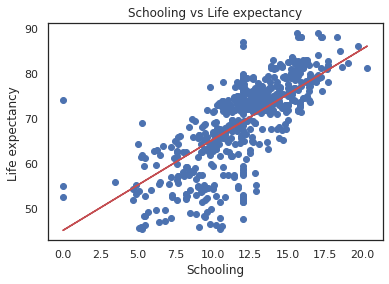

In [42]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.title('Schooling vs Life expectancy')

In [43]:
x = dataset['Income composition of resources'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
income_lin_reg_coef_= lin_reg
income_lin_reg_intercept_= lin_reg.intercept_
print(income_lin_reg_coef_)
print(income_lin_reg_intercept_)

LinearRegression()
[48.85141472]


In [45]:
accuracy_income_test = lin_reg.score(x_test, y_test)
print(accuracy_income_test)

0.40283427703753427


Text(0.5, 1.0, 'Income composition of resources vs Life expectancy')

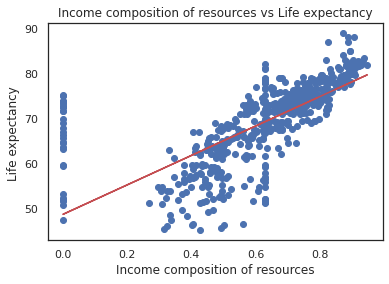

In [46]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy ')
plt.title('Income composition of resources vs Life expectancy')

**Analisis Simple Linear Regression**

In [47]:
print("Dengan Atribut Schooling")
print('-Schooling linear regression coef            :',schooling_lin_reg_coef_)
print('-Schooling linear regression intercept       :',schooling_lin_reg_intercept_)
print('-Schooling linear regression correlation     :',accuracy_schooling_test)
print("\n Dengan Atribut Income composition of resources")
print('-Income composition of resources linear regression coef      :',income_lin_reg_coef_)
print('-Income composition of resources linear regression intercept :',income_lin_reg_intercept_)
print('-Income composition of resources correlation                 :',accuracy_income_test)

Dengan Atribut Schooling
-Schooling linear regression coef            : LinearRegression()
-Schooling linear regression intercept       : [45.23279569]
-Schooling linear regression correlation     : 0.5402502713625079

 Dengan Atribut Income composition of resources
-Income composition of resources linear regression coef      : LinearRegression()
-Income composition of resources linear regression intercept : [48.85141472]
-Income composition of resources correlation                 : 0.40283427703753427
